# Required Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Loading the Datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Column Descriptions
- PassengerId: Unique Id of a passenger
- Survived: Survived (1) or died (0)
- Pclass: Ticket class (1st - Upper, 2nd - Middle, or 3rd - Lower)
- Age: Age of the Passenger; Fractional if Age less than one (1).
- SibSp: Number of siblings/spouses traveling with the passenger
- Parch: Number of parents/children traveling with the passenger
- Ticket: Ticket number
- Fare: Passenger Fare
- Cabin: Cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [5]:
# checking the number of missing values
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# removing duplicates
print(train.shape)
train.drop_duplicates(inplace=True)
print(train.shape)

(891, 12)
(891, 12)


In [7]:
# checking the percentage of missing values in the Age column
print(train.isnull().sum()["Age"]/ len(train))

0.19865319865319866


In [8]:
# checking the percentage of missing values in the Cabin column
print(train.isnull().sum()["Cabin"]/ len(train))

0.7710437710437711


The data shows that 77% of the Cabin entries are nan values. However, this is not ther case as only first class members had cabins labelled A to F, and T and G. Therefore, we can fill the nan values with 'No Cabin' for the other classes later on. 

<Axes: >

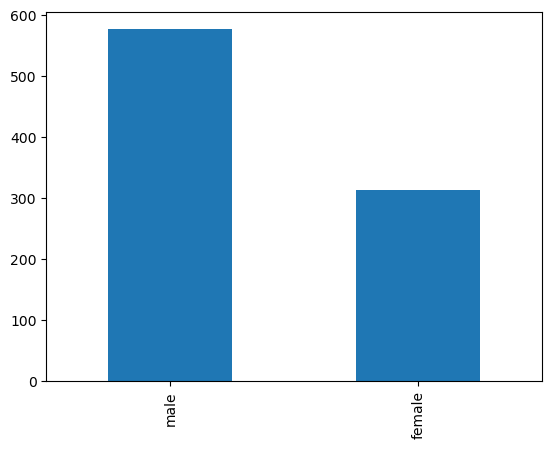

In [9]:
# asserting that only 2 values are present in the column
assert len(train.Sex.unique()) == 2
# if it is 2, then we can plot the bar graph
train.Sex.value_counts().plot(kind='bar', alpha=1)

['S' 'C' 'Q' nan]
After dropping nan entries: ['S' 'C' 'Q']


<Axes: >

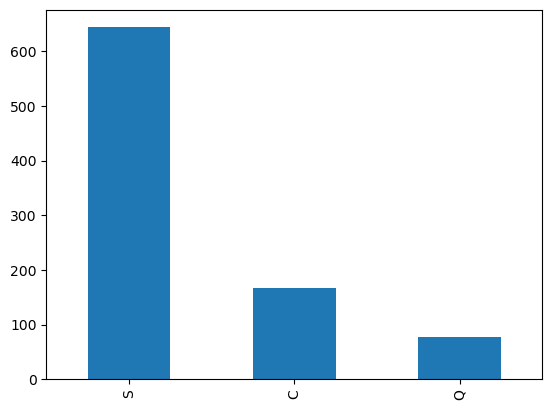

In [10]:
# asserting that only 3 values are present in the Embarked column
print(train.Embarked.unique())

# dropping the rows with null values in the Embarked column
# since there are only 2 null values
train.dropna(subset=['Embarked'], inplace=True)

# asserting that only 2 values are present in the Embarked column
assert len(train.Embarked.unique()) == 3

print("After dropping nan entries:",train.Embarked.unique())
train.Embarked.value_counts().plot(kind='bar')

[3 1 2]
After dropping nan entries: [3 1 2]


<Axes: >

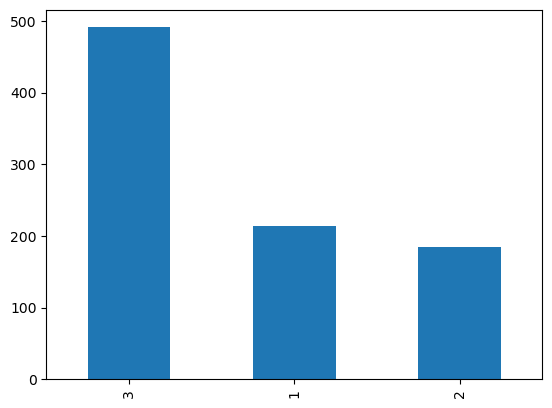

In [11]:
# asserting that only 3 values are present in the Embarked column
print(train.Pclass.unique())

# dropping the rows with null values in the Embarked column
# since there are only 2 null values
train.dropna(subset=['Pclass'], inplace=True)

# asserting that only 2 values are present in the Embarked column
assert len(train.Pclass.unique()) == 3

print("After dropping nan entries:",train.Pclass.unique())
train.Pclass.value_counts().plot(kind='bar')

# Feature Engineering

for reference on feature engineering, please see this [link](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/).

In [12]:
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']

### Adding a Title Column

In [13]:
import string
def look_for_title(name, title_list):
    # looping through our title list
    for title in title_list:
        if title in name:
            return title
    # if we don't find any title in the name
    return np.nan

In [14]:
train['Title'] = train['Name'].map(lambda x: look_for_title(x, title_list))

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Constricting our Title Column to Only [A Single Man (Master), A Single Woman (Miss), A Married Man (Mr), and a Married Woman (Mrs)]

In [16]:
def replace_title(data):
    title = data['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Dr':
        if data['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

train_copy = train.copy()
train_copy['Title'] = train_copy.apply(replace_title, axis=1)
train_copy['Title'].value_counts()

# verifying our result

# checking that the sum of the counts of the Mr corresponding titles that were replaced is equal to the count of the 'Mr' title in our new column
assert (train['Title'].value_counts()['Mr'] + train['Title'].value_counts()['Don'] + train['Title'].value_counts()['Major'] + train['Title'].value_counts()['Capt']
        + train['Title'].value_counts()['Jonkheer'] + train['Title'].value_counts()['Rev'] + train['Title'].value_counts()['Col']
        +  train[train['Sex']=='male']['Title'].value_counts()['Dr'] 
        == train_copy['Title'].value_counts()['Mr'])
print("The assertion test for the 'Mr' title is passed")

# checking that the sum of the counts of the Mrs corresponding titles that were replaced is equal to the count of the 'Mrs' title in our new column
assert (train['Title'].value_counts()['Mrs'] + train['Title'].value_counts()['Countess'] + train['Title'].value_counts()['Mme']
        + train[train['Sex'] == 'female']['Title'].value_counts()['Dr'] 
        == train_copy['Title'].value_counts()['Mrs'])
print("The assertion test for the 'Mrs' title is passed")

# checking that the sum of the counts of the Miss corresponding titles that were replaced is equal to the count of the 'Miss' title in our new column
assert (train['Title'].value_counts()['Miss'] + train['Title'].value_counts()['Mlle'] + train['Title'].value_counts()['Ms']
        == train_copy['Title'].value_counts()['Miss'])
print("The assertion test for the 'Miss' title is passed")

# checking that the sum of the counts of the Master corresponding titles that were replaced is equal to the count of the 'Master' title in our new column
assert (train['Title'].value_counts()['Master'] == train_copy['Title'].value_counts()['Master'])
print("The assertion test for the 'Master' title is passed")

The assertion test for the 'Mr' title is passed
The assertion test for the 'Mrs' title is passed
The assertion test for the 'Miss' title is passed
The assertion test for the 'Master' title is passed


In [17]:
# replacing nan values with "No Cabin" in the Cabin column
train_copy['Cabin'].fillna('No Cabin', inplace=True)
train_copy.Cabin.value_counts()

No Cabin       687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

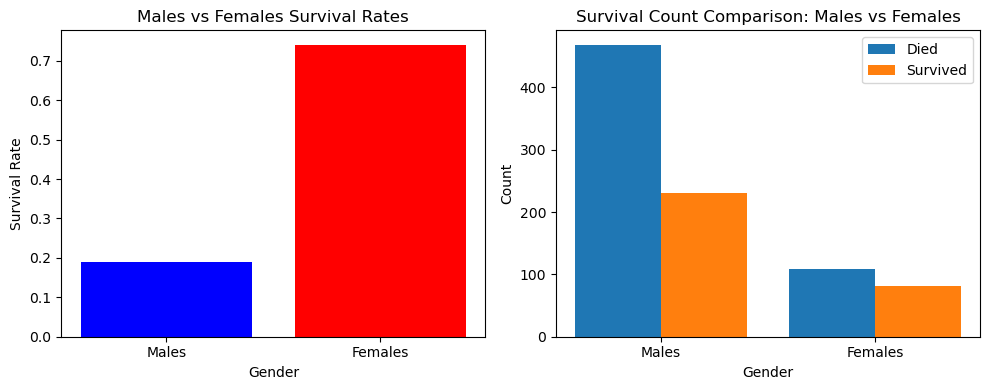

In [18]:
# basic visualizations to understand the data

males = train[train['Sex'] == "male"]
females = train[train['Sex'] == "female"]

# computing survival rates for both
male_survival_rate = males["Survived"].mean()
female_survival_rate = females["Survived"].mean()

male_survival_counts = males["Survived"].value_counts()
female_survival_counts = females["Survived"].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].bar(["Males", "Females"], [male_survival_rate, female_survival_rate], color=["blue", "red"])
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Survival Rate")
axes[0].set_title("Males vs Females Survival Rates")

bar_positions = np.arange(2)
bar_width = 0.4
axes[1].bar(bar_positions - bar_width/2, male_survival_counts, bar_width, label='Died')
axes[1].bar(bar_positions + bar_width/2, female_survival_counts, bar_width, label='Survived')
axes[1].set_title('Survival Count Comparison: Males vs Females')
axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(['Males', 'Females'])
axes[1].set_xlabel("Gender")
axes[1].legend()
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [19]:
# creating decks from the first letter of the cabin column
train_copy['Deck'] = train_copy['Cabin'].map(lambda x: x[0])

# changing N to No Cabin
train_copy['Deck'] = train_copy['Deck'].replace('N', 'No Cabin')

In [20]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,Mr,No Cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,Miss,No Cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,Mr,No Cabin


In [21]:
# creating a column for family size
train_copy['Family_Size'] = train_copy['SibSp'] + train_copy['Parch'] + 1  # with the addition of the person themselves
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,Mr,No Cabin,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,Miss,No Cabin,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,Mr,No Cabin,1


In [22]:
# creating a column for fare per person
train_copy['Fare_Per_Person'] = train_copy['Fare'] / train_copy['Family_Size']
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,Mr,No Cabin,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,Miss,No Cabin,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,Mr,No Cabin,1,8.05000


In [23]:
# filling the missing values in the Embarked column with the mode because it is a categorical variable
train_copy['Embarked'].fillna(train_copy['Embarked'].mode()[0], inplace=True)

C:\Users\Alli Ajagbe\AppData\Local\Temp\ipykernel_8768\1015986198.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_copy['Age'])


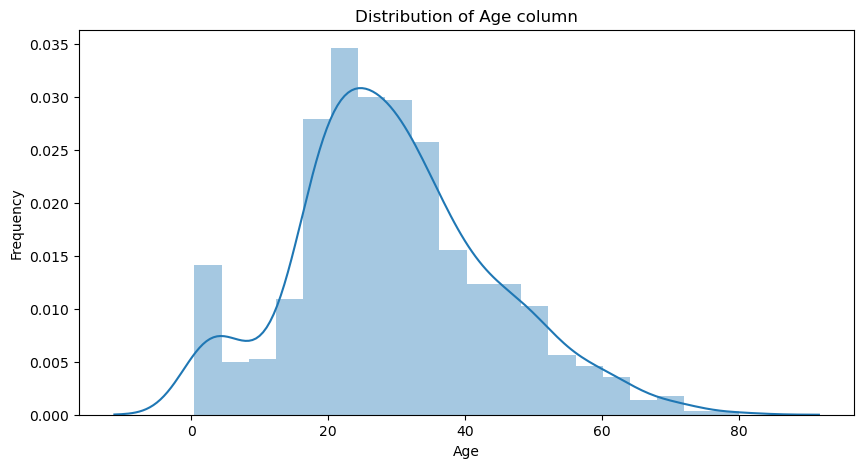

In [24]:
# visualizing the distribution of the Age column
plt.figure(figsize=(10, 5))
sns.distplot(train_copy['Age'])
plt.title('Distribution of Age column')
plt.xlabel('Age')   
plt.ylabel('Frequency')
plt.show()

In [25]:
# seeing that the distribution is skewed to the right, we will use the median to fill the missing values
train_copy['Age'].fillna(train_copy['Age'].median(), inplace=True)

In [26]:
train_copy.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Title              0
Deck               0
Family_Size        0
Fare_Per_Person    0
dtype: int64

In [27]:
train_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Fare_Per_Person
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681,1.906637,19.781204
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504,1.614703,35.767862
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000,7.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,8.158300
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,22.525000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,512.329200


In [28]:
# standardizing the fare, age, sibsp, parch, family_size and fare_per_person columns
scaler = StandardScaler()
train_copy2 = train_copy.copy()
train_copy2[['Fare', 'Age', 'SibSp', 'Parch', 'Family_Size', 'Fare_Per_Person']] = scaler.fit_transform(train_copy2[['Fare', 'Age', 'SibSp', 'Parch', 'Family_Size', 'Fare_Per_Person']])
train_copy2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.563674,0.431350,-0.474326,A/5 21171,-0.500240,No Cabin,S,Mr,No Cabin,0.057853,-0.451950
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.669217,0.431350,-0.474326,PC 17599,0.788947,C85,C,Mrs,C,0.057853,0.443677
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.255451,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,No Cabin,S,Miss,No Cabin,-0.561804,-0.331663
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.438050,0.431350,-0.474326,113803,0.422861,C123,S,Mrs,C,0.057853,0.189349
4,5,0,3,"Allen, Mr. William Henry",male,0.438050,-0.475199,-0.474326,373450,-0.484133,No Cabin,S,Mr,No Cabin,-0.561804,-0.328166


In [29]:
# dealing with categorical columns
# one hot encoding for the sex column
encoded_train = pd.get_dummies(train_copy2, columns=['Sex'], prefix=['is'])
encoded_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Size,Fare_Per_Person,is_female,is_male
0,1,0,3,"Braund, Mr. Owen Harris",-0.563674,0.431350,-0.474326,A/5 21171,-0.500240,No Cabin,S,Mr,No Cabin,0.057853,-0.451950,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.669217,0.431350,-0.474326,PC 17599,0.788947,C85,C,Mrs,C,0.057853,0.443677,1,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.255451,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,No Cabin,S,Miss,No Cabin,-0.561804,-0.331663,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.438050,0.431350,-0.474326,113803,0.422861,C123,S,Mrs,C,0.057853,0.189349,1,0
4,5,0,3,"Allen, Mr. William Henry",0.438050,-0.475199,-0.474326,373450,-0.484133,No Cabin,S,Mr,No Cabin,-0.561804,-0.328166,0,1


In [30]:
# one hot encoding for the embarked column
encoded_train = pd.get_dummies(encoded_train, columns=['Embarked'], prefix=['Embarked'])
# one hot encoding for the title column
encoded_train = pd.get_dummies(encoded_train, columns=['Title'], prefix=['Title'])
# label encoding for the deck column because it is ordinal
encoded_train['Deck'] = encoded_train['Deck'].map({'No Cabin': 0, 'A':8, 'B':7, 'C':6, 'D':5, 'E':4, 'F':3, 'G':2, 'T':1})

In [31]:
# increasing the number of columns to display
pd.set_option('display.max_columns', 100)

In [32]:
encoded_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Deck,Family_Size,Fare_Per_Person,is_female,is_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",-0.563674,0.431350,-0.474326,A/5 21171,-0.500240,No Cabin,0,0.057853,-0.451950,0,1,0,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.669217,0.431350,-0.474326,PC 17599,0.788947,C85,6,0.057853,0.443677,1,0,1,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",-0.255451,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,No Cabin,0,-0.561804,-0.331663,1,0,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.438050,0.431350,-0.474326,113803,0.422861,C123,6,0.057853,0.189349,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0.438050,-0.475199,-0.474326,373450,-0.484133,No Cabin,0,-0.561804,-0.328166,0,1,0,0,1,0,0,1,0


In [33]:
# creating a copy of the encoded train dataset
encoded_train2 = encoded_train.copy()

In [34]:
# dropping the columns not needed for training
encoded_train2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
encoded_train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Family_Size,Fare_Per_Person,is_female,is_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,-0.563674,0.431350,-0.474326,-0.500240,0,0.057853,-0.451950,0,1,0,0,1,0,0,1,0
1,1,1,0.669217,0.431350,-0.474326,0.788947,6,0.057853,0.443677,1,0,1,0,0,0,0,0,1
2,1,3,-0.255451,-0.475199,-0.474326,-0.486650,0,-0.561804,-0.331663,1,0,0,0,1,0,1,0,0
3,1,1,0.438050,0.431350,-0.474326,0.422861,6,0.057853,0.189349,1,0,0,0,1,0,0,0,1
4,0,3,0.438050,-0.475199,-0.474326,-0.484133,0,-0.561804,-0.328166,0,1,0,0,1,0,0,1,0


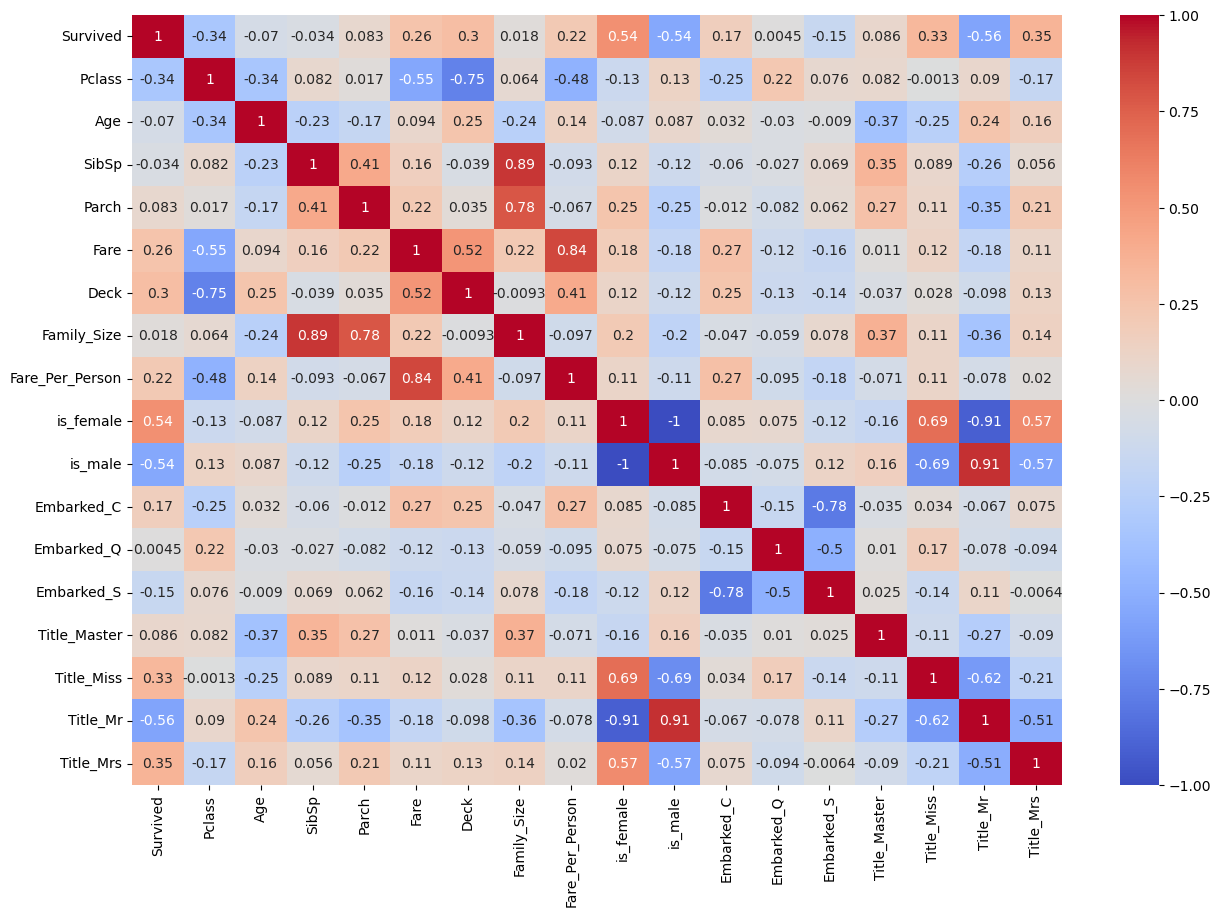

In [35]:
# checking for the correlation between the columns
plt.figure(figsize=(15, 10))
sns.heatmap(encoded_train2.corr(), annot=True, cmap='coolwarm')
plt.show()

In [36]:
encoded_train2.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Family_Size,Fare_Per_Person,is_female,is_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290,0.296833,0.018277,0.217902,0.541585,-0.541585,0.169966,0.004536,-0.151777,0.085998,0.332100,-0.564986,0.351953
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193,-0.745013,0.064221,-0.482024,-0.127741,0.127741,-0.245733,0.220558,0.076466,0.081547,-0.001330,0.090098,-0.170488
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707,0.249955,-0.244631,0.139319,-0.086506,0.086506,0.032098,-0.030436,-0.008964,-0.374626,-0.247119,0.243211,0.164255
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887,-0.039308,0.890654,-0.093211,0.116348,-0.116348,-0.060074,-0.026692,0.069438,0.349434,0.088945,-0.261657,0.055615
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532,0.035248,0.782988,-0.067422,0.247508,-0.247508,-0.011588,-0.081585,0.061512,0.267194,0.106625,-0.354798,0.212133
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000,0.521702,0.218658,0.840902,0.179958,-0.179958,0.270731,-0.116684,-0.163758,0.011390,0.119513,-0.180449,0.106537
Deck,0.296833,-0.745013,0.249955,-0.039308,0.035248,0.521702,1.000000,-0.009257,0.406674,0.116942,-0.116942,0.247107,-0.128901,-0.135369,-0.037351,0.028461,-0.098292,0.125125
Family_Size,0.018277,0.064221,-0.244631,0.890654,0.782988,0.218658,-0.009257,1.000000,-0.097399,0.203191,-0.203191,-0.046852,-0.059007,0.078197,0.372350,0.114070,-0.356120,0.144004
Fare_Per_Person,0.217902,-0.482024,0.139319,-0.093211,-0.067422,0.840902,0.406674,-0.097399,1.000000,0.110606,-0.110606,0.273974,-0.095189,-0.180131,-0.071287,0.113278,-0.077725,0.020241
is_female,0.541585,-0.127741,-0.086506,0.116348,0.247508,0.179958,0.116942,0.203191,0.110606,1.000000,-1.000000,0.084520,0.075217,-0.121405,-0.159612,0.687596,-0.908250,0.565343


# Training the Model

In [37]:
model = LinearRegression()
model.fit(encoded_train2.drop('Survived', axis=1), encoded_train2['Survived'])

LinearRegression()

In [38]:
# checking the coefficients of the model
model.coef_

array([-0.12654256, -0.04296901, -0.04695933, -0.02134601,  0.03281452,
        0.01225054, -0.04276352, -0.01447577,  0.09983246, -0.09983246,
        0.02525259,  0.00673255, -0.03198515,  0.23082301,  0.00496642,
       -0.33065548,  0.09486604])

In [39]:
# getting the feature importances
for i, col in enumerate(encoded_train2.drop('Survived', axis=1).columns):
    print(col, ':', model.coef_[i])

Pclass : -0.12654255721754432
Age : -0.0429690053610992
SibSp : -0.04695932524345433
Parch : -0.021346012972045556
Fare : 0.032814522547217624
Deck : 0.012250542630907248
Family_Size : -0.04276351685243181
Fare_Per_Person : -0.014475765653924205
is_female : 0.0998324611733232
is_male : -0.09983246117332342
Embarked_C : 0.02525259493259261
Embarked_Q : 0.006732554071594274
Embarked_S : -0.0319851490041869
Title_Master : 0.2308230147708885
Title_Miss : 0.004966417340376999
Title_Mr : -0.3306554759442119
Title_Mrs : 0.09486604383294632


In [40]:
# testing the model on the train dataset
print(model.score(encoded_train2.drop('Survived', axis=1), encoded_train2['Survived']))

0.44246254635514337


## Using Logistic Regression

In [48]:
logistic = LogisticRegression()
logistic.fit(encoded_train2.drop('Survived', axis=1), encoded_train2['Survived'])

LogisticRegression()

In [49]:
# testing the model on the train dataset
print(logistic.score(encoded_train2.drop('Survived', axis=1), encoded_train2['Survived']))

0.8301462317210349


In [64]:
# getting the feature importances in descending order
feature_importances = pd.DataFrame(logistic.coef_[0],
                                      index = encoded_train2.drop('Survived', axis=1).columns,
                                        columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
Title_Master,1.302176
Title_Mrs,0.605759
is_female,0.557217
Fare,0.193526
Embarked_C,0.168450
Deck,0.089420
Embarked_Q,0.052344
Title_Miss,-0.048542
Fare_Per_Person,-0.073220
Parch,-0.119862


In [68]:
req_features = ['Pclass', 'Title_Master', 'Title_Mrs', 'Title_Mr', 'is_female', 'is_male', 'Family_Size', 'SibSp', 'Age', 'Parch']

# training the model on the required features
logistic.fit(encoded_train2[req_features], encoded_train2['Survived'])

LogisticRegression()

In [69]:
print(logistic.score(encoded_train2[req_features], encoded_train2['Survived']))

0.829021372328459


## Using Random Forest

In [60]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(encoded_train2.drop('Survived', axis=1), encoded_train2['Survived'])

RandomForestClassifier(max_depth=5, random_state=1)

In [61]:
# testing the model on the train dataset
print(rf.score(encoded_train2.drop('Survived', axis=1), encoded_train2['Survived']))

0.8470191226096738


### Random Forest on Extracted Features

In [71]:
rf.fit(encoded_train2[req_features], encoded_train2['Survived'])

print(rf.score(encoded_train2[req_features], encoded_train2['Survived']))

0.8346456692913385


In [72]:
# feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                        index = encoded_train2[req_features].columns,
                                        columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
Title_Mr,0.228501
is_male,0.213510
Pclass,0.151867
is_female,0.128242
Age,0.071797
Family_Size,0.066454
SibSp,0.050385
Title_Mrs,0.045773
Parch,0.025327
Title_Master,0.018145


### Preparing the Test Data

In [41]:
# predicting on test data whether a passenger survived or not
test_copy = test.copy()

In [42]:
# applying the same transformations to the test data as we did to the train data
test_copy['Title'] = test_copy['Name'].map(lambda x: look_for_title(x, title_list))
test_copy['Title'] = test_copy.apply(replace_title, axis=1)
test_copy['Cabin'].fillna('No Cabin', inplace=True)
test_copy['Deck'] = test_copy['Cabin'].map(lambda x: x[0])
test_copy['Deck'] = test_copy['Deck'].replace('N', 'No Cabin')
test_copy['Family_Size'] = test_copy['SibSp'] + test_copy['Parch'] + 1  # with the addition of the person themselves
test_copy['Fare_Per_Person'] = test_copy['Fare'] / test_copy['Family_Size']
test_copy['Embarked'].fillna(test_copy['Embarked'].mode()[0], inplace=True)
test_copy['Age'].fillna(test_copy['Age'].median(), inplace=True)
test_copy[['Fare', 'Age', 'SibSp', 'Parch', 'Family_Size', 'Fare_Per_Person']] = scaler.fit_transform(test_copy[['Fare', 'Age', 'SibSp', 'Parch', 'Family_Size', 'Fare_Per_Person']])

In [43]:
# dealing with categorical columns on our test data
# one hot encoding for the sex column
test_copy = pd.get_dummies(test_copy, columns=["Sex"], prefix=["is"])

In [44]:
test_copy = pd.get_dummies(test_copy, columns=["Embarked"], prefix=["Embarked"])
test_copy = pd.get_dummies(test_copy, columns=["Title"], prefix=["Title"])

In [45]:
# label encoding for the deck column because it is ordinal
test_copy['Deck'] = test_copy['Deck'].map({'No Cabin': 0, 'A':8, 'B':7, 'C':6, 'D':5, 'E':4, 'F':3, 'G':2, 'T':1})

In [46]:
test_copy.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Deck,Family_Size,Fare_Per_Person,is_female,is_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,892,3,"Kelly, Mr. James",0.386231,-0.499470,-0.400248,330911,-0.497811,No Cabin,0,-0.553443,-0.392588,0,1,0,1,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1.371370,0.616992,-0.400248,363272,-0.512660,No Cabin,0,0.105643,-0.514205,1,0,0,0,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",2.553537,-0.499470,-0.400248,240276,-0.464532,No Cabin,0,-0.553443,-0.340384,0,1,0,1,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",-0.204852,-0.499470,-0.400248,315154,-0.482888,No Cabin,0,-0.553443,-0.369179,0,1,0,0,1,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",-0.598908,0.616992,0.619896,3101298,-0.417971,No Cabin,0,0.764728,-0.497467,1,0,0,0,1,0,0,0,1


In [58]:
# checking for nan values within the test data

# replacing the nan value in the fare column with the mean
test_copy['Fare'].fillna(test_copy['Fare'].mean(), inplace=True)

# replacing the nan value in the fare per person column with the mean
test_copy['Fare_Per_Person'].fillna(test_copy['Fare_Per_Person'].mean(), inplace=True)

### Logistic Regression Predictions

In [59]:
predictions = logistic.predict(test_copy.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))

# creating a dataframe with the predictions
submission = pd.DataFrame({'PassengerId': test_copy['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file successfully saved!")

Submission file successfully saved!


### Updated Logistic Regression Predictions

In [70]:
predictions = logistic.predict(test_copy[req_features])

# creating a dataframe with the predictions
submission = pd.DataFrame({'PassengerId': test_copy['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file successfully saved!")

Submission file successfully saved!


### Random Forest Predictions

In [62]:
rf_predictions = rf.predict(test_copy.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))

# creating a dataframe with the predictions
submission = pd.DataFrame({'PassengerId': test_copy['PassengerId'], 'Survived': rf_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file successfully saved!")

Submission file successfully saved!


### Updated Random Forest Predictions

In [ ]:
rf_predictions = rf.predict(test_copy[req_features])

# creating a dataframe with the predictions
submission = pd.DataFrame({'PassengerId': test_copy['PassengerId'], 'Survived': rf_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file successfully saved!")